<img src='https://www.iss.nus.edu.sg/Sitefinity/WebsiteTemplates/ISS/App_Themes/ISS/Images/branding-iss.png' width=15% style="float: right;">
<img src='https://www.iss.nus.edu.sg/Sitefinity/WebsiteTemplates/ISS/App_Themes/ISS/Images/branding-nus.png' width=15% style="float: right;">


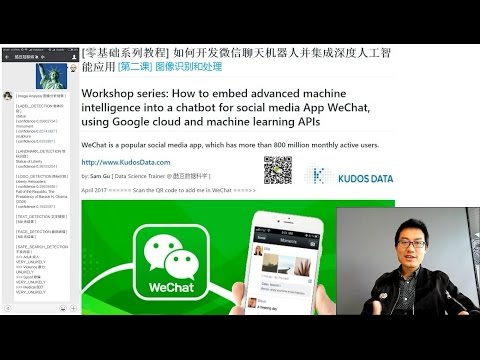

In [1]:
import IPython.display
IPython.display.YouTubeVideo('FPgo-hI7OiE')

# 如何使用和开发微信聊天机器人的系列教程
# A workshop to develop & use an intelligent and interactive chat-bot in WeChat

### WeChat is a popular social media app, which has more than 800 million monthly active users.

<img src='https://www.iss.nus.edu.sg/images/default-source/About-Us/7.6.1-teaching-staff/sam-website.tmb-.png' width=8% style="float: right;">
<img src='reference/WeChat_SamGu_QR.png' width=10% style="float: right;">


by: GU Zhan (Sam)


October 2018 : Update to support Python 3 in local machine, e.g. iss-vm.


April 2017 ======= Scan the QR code to become trainer's friend in WeChat =====>>

### 第二课：图像识别和处理
### Lesson 2: Image Recognition & Processing

* 识别图片消息中的物体名字 (Recognize objects in image)
        [1] 物体名 (General Object)
        [2] 地标名 (Landmark Object)
        [3] 商标名 (Logo Object)

* 识别图片消息中的文字 (OCR: Extract text from image)

* 识别图片消息中的文字 (OCR: Extract text from image)

* 识别人脸 (Recognize human face)
        人脸检测和画框 (Output new image with framed face)
        人脸表情识别: 喜怒哀乐等情绪 (Identify sentiment and emotion from human face)

* 不良内容识别 (Explicit Content Detection)

* 线上实体检测 (Detecting Web Entities and Pages)


### Using Google Cloud Platform's Machine Learning APIs

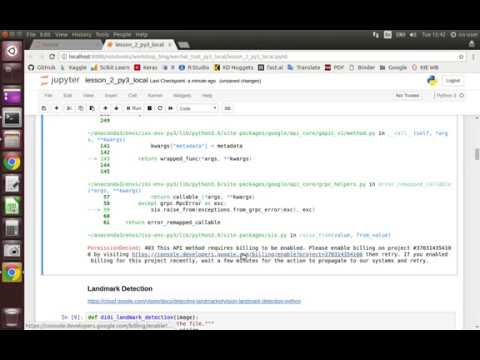

In [2]:
# [ Video Guide ] S IPA Create Google Cloud Account and APIs 1:
IPython.display.YouTubeVideo('ObVORs_UGhs')

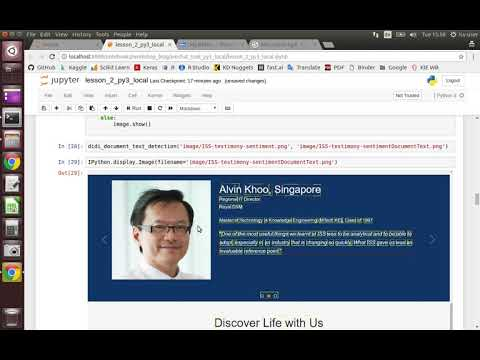

In [3]:
# [ Video Guide ] S IPA Create Google Cloud Account and APIs 2:
IPython.display.YouTubeVideo('DJVURzM3_ZM')

From the same API console, choose "Dashboard" on the left-hand menu and "Enable API".

Enable the following APIs for your project (search for them) if they are not already enabled:
<ol>
**<li> Google Cloud Vision API </li>**
</ol>

Finally, because we are calling the APIs from Python (clients in many other languages are available), let's install the Python package (it's not installed by default on Datalab)

In [4]:
# Copyright 2016 Google Inc.
# Licensed under the Apache License, Version 2.0 (the "License"); 
# !pip install --upgrade google-api-python-client

## <span style="color:blue">Install the client library</span>

In [5]:
!pip install --upgrade google-cloud-vision

### 导入需要用到的一些功能程序库：

In [7]:
import io
import os

# import IPython.display

# Imports the Google Cloud client library
from google.cloud import vision
# from google.cloud.vision import types

### Before proceeding, ensure to ENABLE this cloud API, e.g. via web console https://console.cloud.google.com 

In [8]:
# Vision API

# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
# client = vision.ImageAnnotatorClient()

# (2) Instantiates a client - using 'service account json' file
client = vision.ImageAnnotatorClient.from_service_account_json(
        "/media/sf_vm_shared_folder/git/key-shine-326005-0f68e521cb3e.json")


---

## <span style="color:blue">Use cloud APIs in native forms:</span>

### Label Detection
https://cloud.google.com/vision/docs/quickstart-client-libraries

In [12]:
def didi_label_detection(image_file, max_results=4):
    """Uses the Vision API to detect labels in the given file.

    Args:
        face_file: A file-like object containing an image with faces.

    Returns:
        An array of lABEL objects with information about the picture.
    """

##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

# Loads the image into memory
#     with open(image_file, 'rb') as image:
    with io.open(image_file, 'rb') as image:
        content = image.read()

#     image = types.Image(content=content)        
    image = vision.Image(content=content)        
        
    # Performs label detection on the image file
    response = client.label_detection(image=image)
    labels = response.label_annotations

    print('Labels:')
    for label in labels:
        print(label.description)

#     return client.label_detection(image=image).label_annotations
    return labels

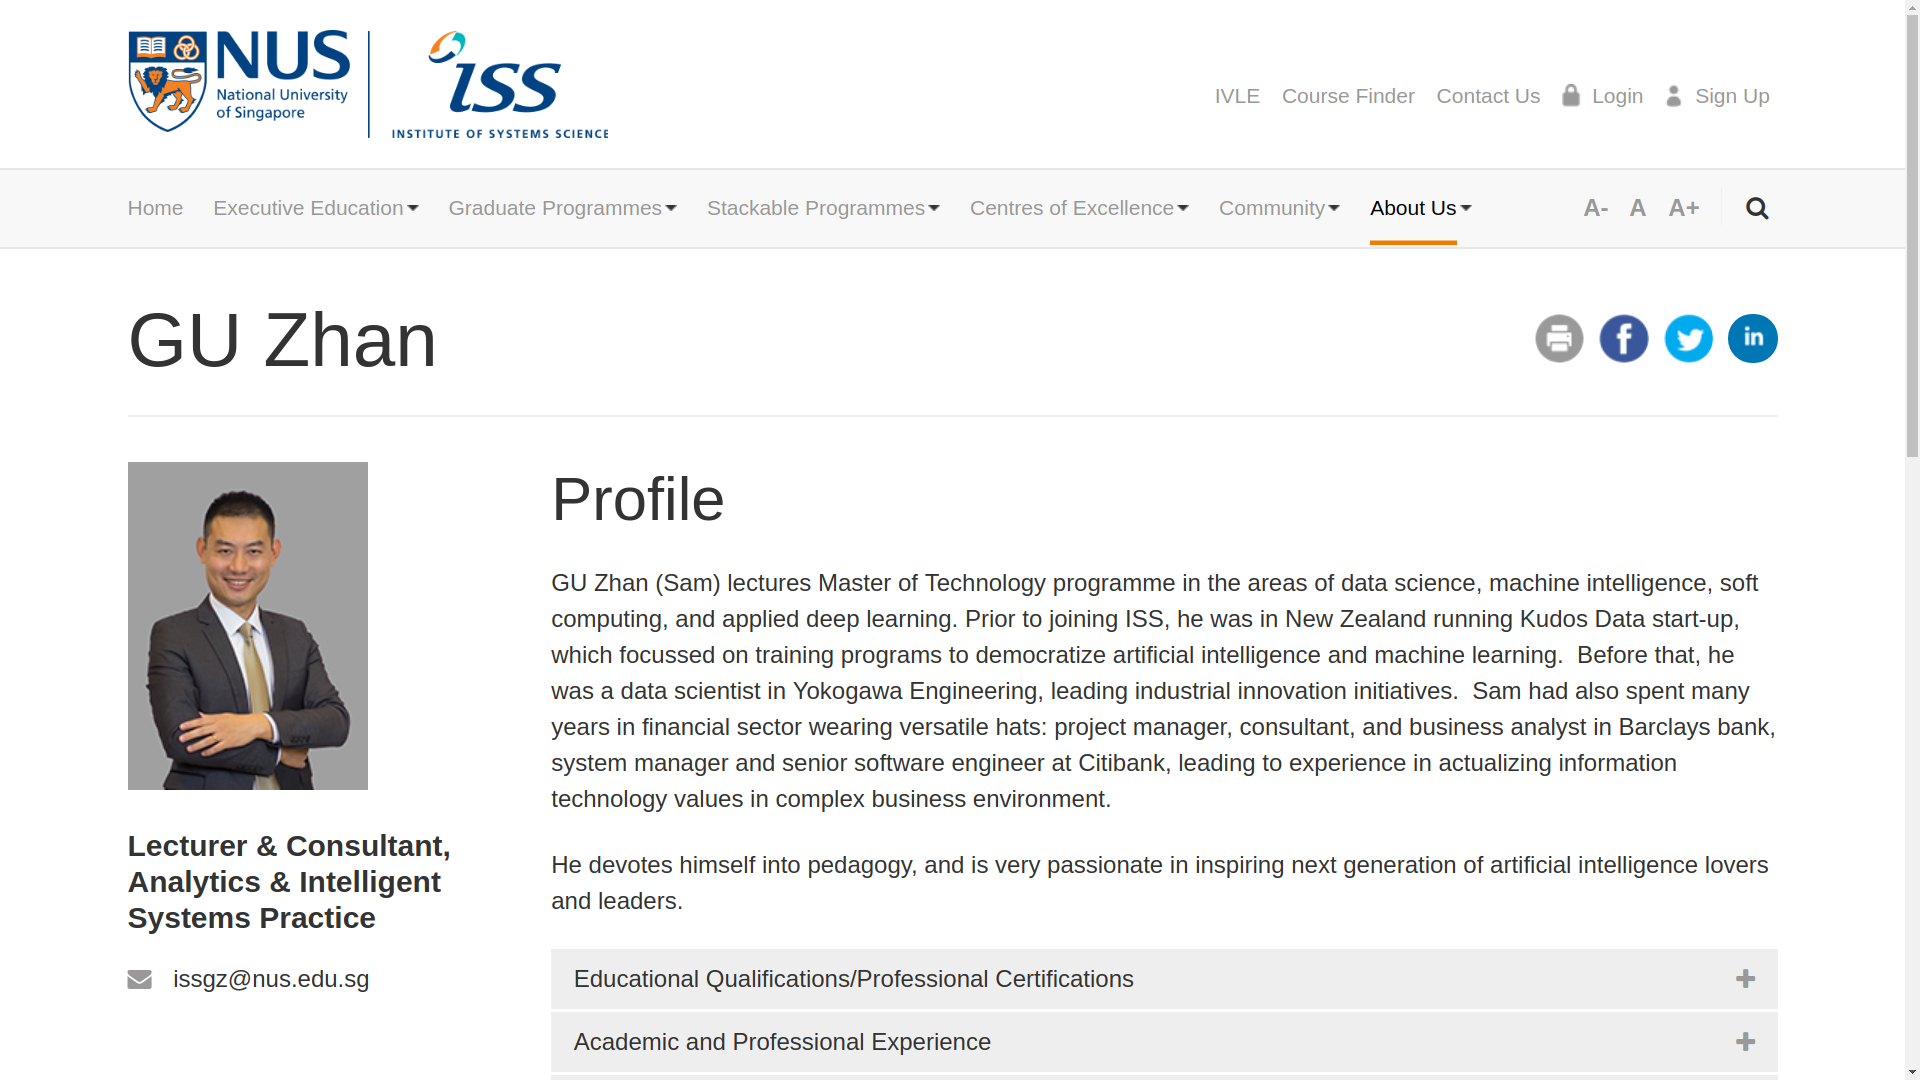

In [13]:
IPython.display.Image(filename='image/ISSGZ.png')

In [14]:
didi_label_detection('image/ISSGZ.png')

Labels:
Tie
Screenshot
Font
Suit
Blazer
Collar
Web page
Multimedia
Formal wear
Website


[mid: "/m/01rkbr"
description: "Tie"
score: 0.8095896244049072
topicality: 0.8095896244049072
, mid: "/m/01zbnw"
description: "Screenshot"
score: 0.7965548038482666
topicality: 0.7965548038482666
, mid: "/m/03gq5hm"
description: "Font"
score: 0.7964791059494019
topicality: 0.7964791059494019
, mid: "/m/01xyhv"
description: "Suit"
score: 0.7810423374176025
topicality: 0.7810423374176025
, mid: "/m/04xz_5"
description: "Blazer"
score: 0.7658053636550903
topicality: 0.7658053636550903
, mid: "/m/091410"
description: "Collar"
score: 0.7488397359848022
topicality: 0.7488397359848022
, mid: "/m/086nh"
description: "Web page"
score: 0.748322069644928
topicality: 0.748322069644928
, mid: "/m/0541p"
description: "Multimedia"
score: 0.670758068561554
topicality: 0.670758068561554
, mid: "/m/02w3_2"
description: "Formal wear"
score: 0.624000608921051
topicality: 0.624000608921051
, mid: "/m/085n4"
description: "Website"
score: 0.6070968508720398
topicality: 0.6070968508720398
]

### Landmark Detection
https://cloud.google.com/vision/docs/detecting-landmarks#vision-landmark-detection-python

In [15]:
def didi_landmark_detection(image):
    """Detects landmarks in the file."""
    from google.cloud import vision
    
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.landmark_detection(image=image)
    landmarks = response.landmark_annotations
    print('Landmarks:')

    for landmark in landmarks:
        print(landmark.description)
        for location in landmark.locations:
            lat_lng = location.lat_lng
            print('Latitude {}'.format(lat_lng.latitude))
            print('Longitude {}'.format(lat_lng.longitude))

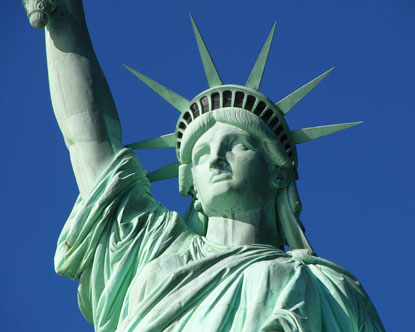

In [16]:
IPython.display.Image(filename='image/new-york-statue-of-liberty.jpg')

In [17]:
didi_landmark_detection('image/new-york-statue-of-liberty.jpg')

Landmarks:
Liberty Island
Latitude 40.689824
Longitude -74.045047
Statue of Liberty
Latitude 40.689261
Longitude -74.044482
Statue of Liberty National Monument
Latitude 40.6892494
Longitude -74.04450039999999


In [18]:
didi_landmark_detection('image/ISSGZ.png')

Landmarks:


### Logo Detection
https://cloud.google.com/vision/docs/detecting-logos

In [19]:
def didi_logo_detection(image):
    """Detects logos in the file."""
    from google.cloud import vision
        
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.logo_detection(image=image)
    logos = response.logo_annotations
    print('Logos:')

    for logo in logos:
        print(logo.description)

In [20]:
didi_logo_detection('image/ISSGZ.png')

Logos:
National University of Singapore
SSP Group


### Text Detection (OCR)
https://cloud.google.com/vision/docs/detecting-text

In [21]:
def didi_text_detection(image):
    """Detects text in the file."""
    from google.cloud import vision
        
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))
    

In [22]:
didi_text_detection('image/ISSGZ.png')

Texts:

"E
|NUS
National University
of Singapore
Login
Sign Up
IVLE
Course Finder Contact Us
INSTITUTE OF SYSTEMS SCIENCE
Home
Executive Education
Graduate Programmes
Stackable Programmes♥
Centres of Excellence-
Community
About Us-
A- A A+
Q
GU Zhan
f
in
Profile
GU Zhan (Sam) lectures Master of Technology programme in the areas of data science, machine intelligence, soft
computing, and applied deep learning. Prior to joining ISS, he was in New Zealand running Kudos Data start-up,
which focussed on training programs to democratize artificial intelligence and machine learning. Before that, he
was a data scientist in Yokogawa Engineering, leading industrial innovation initiatives. Sam had also spent many
years in financial sector wearing versatile hats: project manager, consultant, and business analyst in Barclays bank,
system manager and senior software engineer at Citibank, leading to experience in actualizing information
technology values in complex business environment.
Lecturer & Con

### Face Detection : Output new image with framed face(s) 
https://cloud.google.com/vision/docs/face-tutorial

In [23]:
from PIL import Image, ImageDraw

In [26]:
def detect_face(face_file, max_results=20):
    """Uses the Vision API to detect faces in the given file.

    Args:
        face_file: A file-like object containing an image with faces.

    Returns:
        An array of Face objects with information about the picture.
    """
        
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################
    
    content = face_file.read()
#     image = types.Image(content=content)
    image = vivison.Image(content=content)

    return client.face_detection(image=image).face_annotations

In [27]:
def highlight_faces(image, faces, output_filename):
    """Draws a polygon around the faces, then saves to output_filename.

    Args:
      image: a file containing the image with the faces.
      faces: a list of faces found in the file. This should be in the format
          returned by the Vision API.
      output_filename: the name of the image file to be created, where the
          faces have polygons drawn around them.
    """
    im = Image.open(image)
    draw = ImageDraw.Draw(im)

    for face in faces:
        box = [(vertex.x, vertex.y)
               for vertex in face.bounding_poly.vertices]
        draw.line(box + [box[0]], width=5, fill='#00ff00')

    im.save(output_filename)

In [28]:
def didi_face_detection(input_filename, output_filename='image/DetectedFace.png', max_results=20):
    with open(input_filename, 'rb') as image:
        faces = detect_face(image, max_results)
        print('Found {} face{}'.format(
            len(faces), '' if len(faces) == 1 else 's'))

        print('Writing to file {}'.format(output_filename))
        # Reset the file pointer, so we can read the file again
        image.seek(0)
        highlight_faces(image, faces, output_filename)

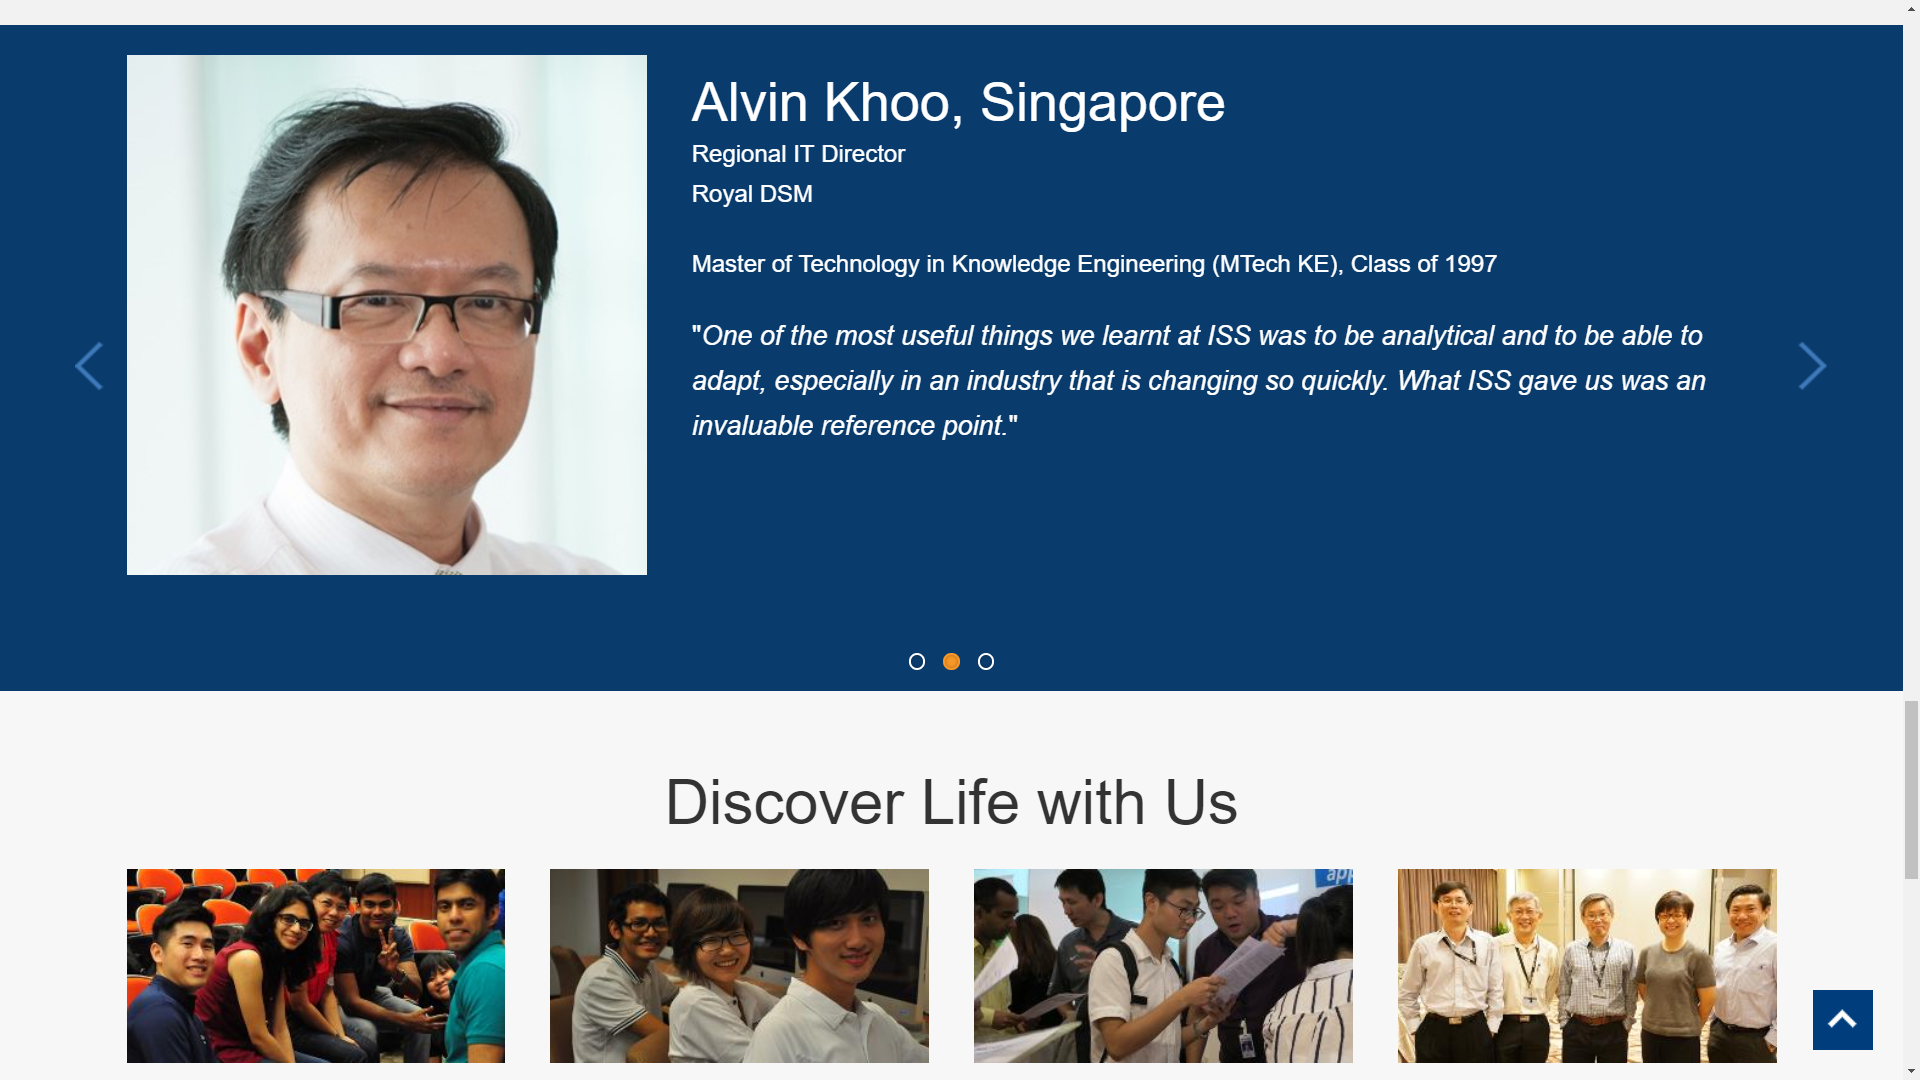

In [29]:
IPython.display.Image(filename='image/ISS-testimony-sentiment.png')

In [30]:
didi_face_detection('image//ISS-testimony-sentiment.png', 'image//ISS-testimony-sentimentDetectedFace.png')

NameError: name 'vivison' is not defined

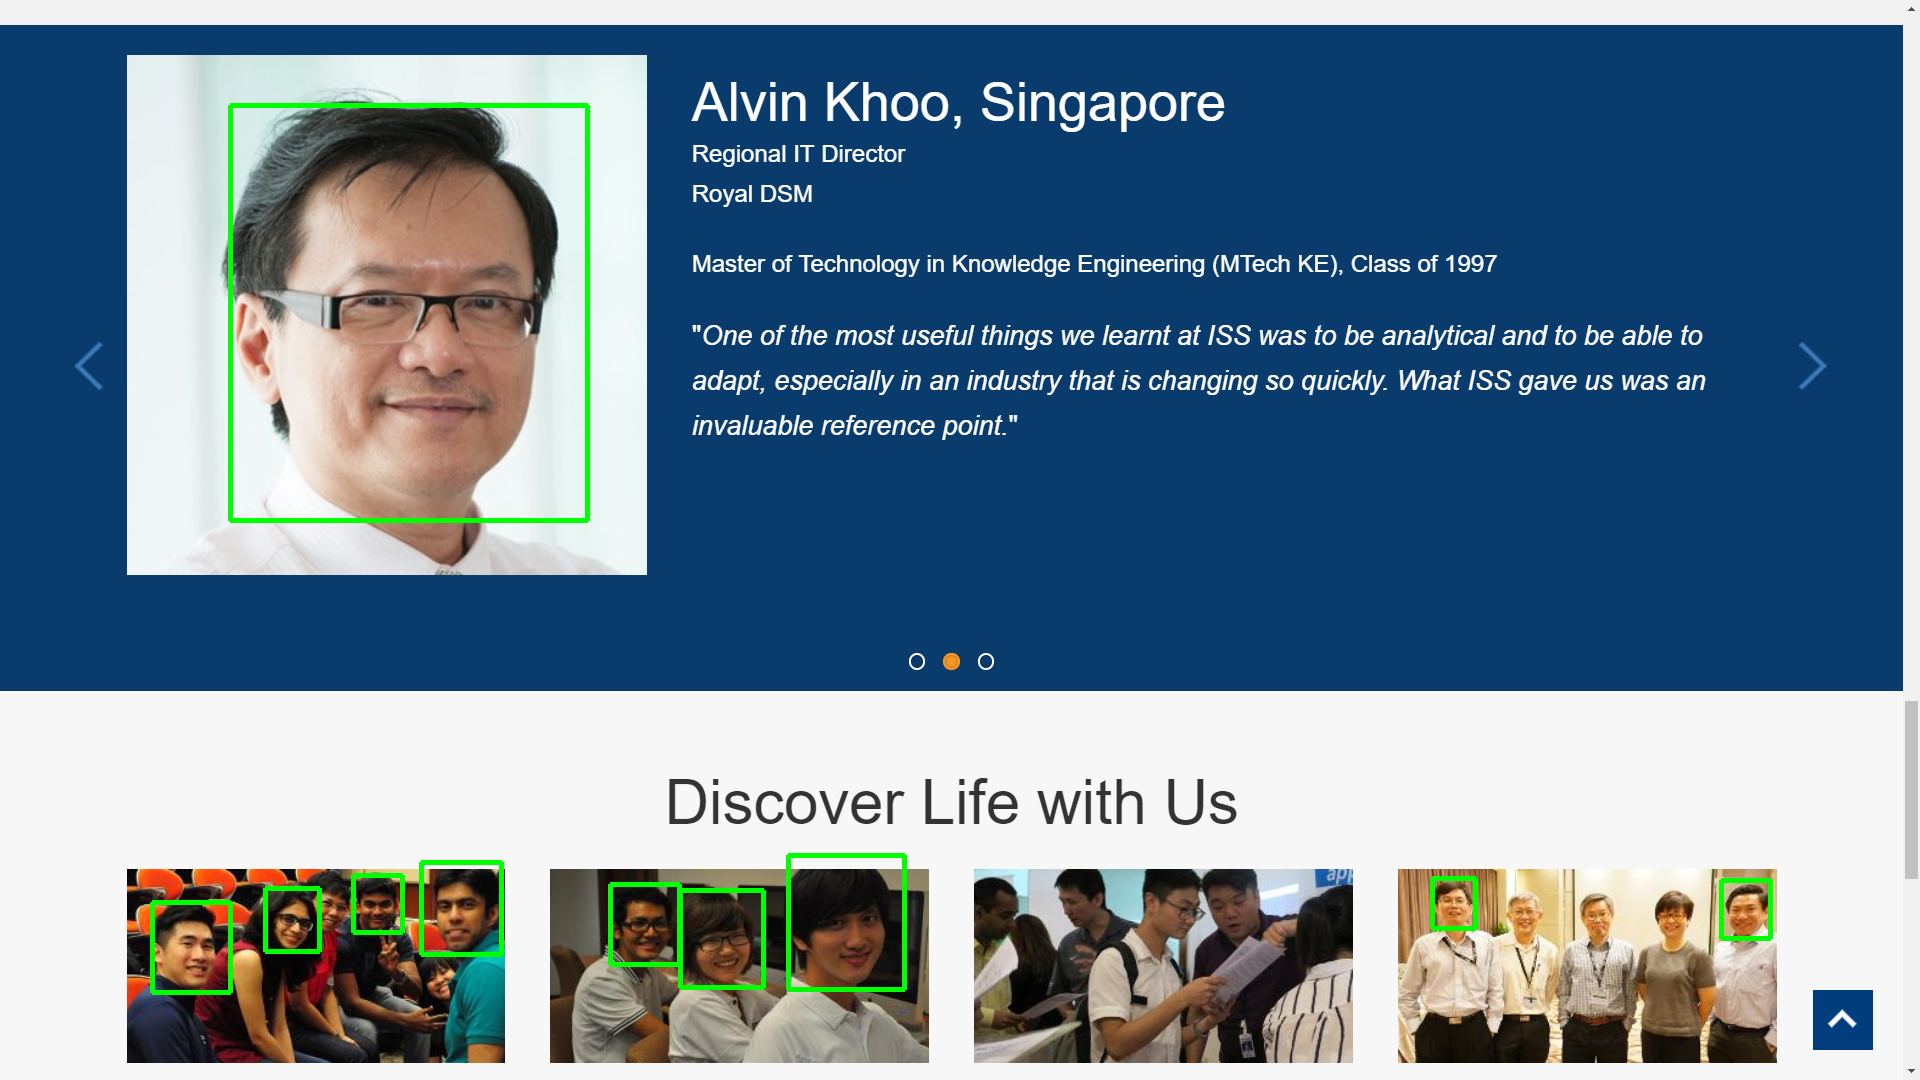

In [31]:
IPython.display.Image(filename='image//ISS-testimony-sentimentDetectedFace.png')

### Face Detection : Identify sentiment and emotion from human face
https://cloud.google.com/vision/docs/detecting-faces

In [32]:
def didi_face_detection_emotion(image):
    """Detects faces in an image."""
    from google.cloud import vision
        
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################
   
    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Found {} face{}  : Emotion '.format(len(faces), '' if len(faces) == 1 else 's'))

    for face in faces:
        print('  * anger       : {}'.format(likelihood_name[face.anger_likelihood]))
        print('  * joy         : {}'.format(likelihood_name[face.joy_likelihood]))
        print('  * sorrow      : {}'.format(likelihood_name[face.sorrow_likelihood]))
        print('  * surprise    : {}'.format(likelihood_name[face.surprise_likelihood]))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        print('  * face bounds : {}\n'.format(','.join(vertices)))

In [33]:
didi_face_detection_emotion('image/ISS-testimony-sentiment.png')

Found 10 faces  : Emotion 
  * anger       : VERY_UNLIKELY
  * joy         : VERY_LIKELY
  * sorrow      : VERY_UNLIKELY
  * surprise    : VERY_UNLIKELY
  * face bounds : (788,855),(904,855),(904,989),(788,989)

  * anger       : VERY_UNLIKELY
  * joy         : VERY_LIKELY
  * sorrow      : VERY_UNLIKELY
  * surprise    : VERY_UNLIKELY
  * face bounds : (230,105),(587,105),(587,520),(230,520)

  * anger       : VERY_UNLIKELY
  * joy         : VERY_LIKELY
  * sorrow      : VERY_UNLIKELY
  * surprise    : VERY_UNLIKELY
  * face bounds : (1721,880),(1770,880),(1770,938),(1721,938)

  * anger       : VERY_UNLIKELY
  * joy         : VERY_LIKELY
  * sorrow      : VERY_UNLIKELY
  * surprise    : VERY_UNLIKELY
  * face bounds : (610,884),(679,884),(679,964),(610,964)

  * anger       : VERY_UNLIKELY
  * joy         : VERY_LIKELY
  * sorrow      : VERY_UNLIKELY
  * surprise    : VERY_UNLIKELY
  * face bounds : (265,888),(319,888),(319,951),(265,951)

  * anger       : VERY_UNLIKELY
  * joy     

### Document Text Detection
https://cloud.google.com/vision/docs/fulltext-annotations

In [35]:
import argparse
from enum import Enum
import io

from google.cloud import vision
# from google.cloud.vision import types
from PIL import Image, ImageDraw


class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5


def draw_boxes(image, bounds, color):
    """Draw a border around the image using the hints in the vector list."""
    draw = ImageDraw.Draw(image)

    for bound in bounds:
        draw.polygon([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y], None, color)
    return image


def get_document_bounds(image_file, feature):
    """Returns document bounds given an image."""
    
        
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    bounds = []

    with io.open(image_file, 'rb') as image_file:
        content = image_file.read()

#     image = types.Image(content=content)
    image = vision.Image(content=content)

    response = client.document_text_detection(image=image)
    document = response.full_text_annotation

    # Collect specified feature bounds by enumerating all document features
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    for symbol in word.symbols:
                        if (feature == FeatureType.SYMBOL):
                            bounds.append(symbol.bounding_box)

                    if (feature == FeatureType.WORD):
                        bounds.append(word.bounding_box)

                if (feature == FeatureType.PARA):
                    bounds.append(paragraph.bounding_box)

            if (feature == FeatureType.BLOCK):
                bounds.append(block.bounding_box)

        if (feature == FeatureType.PAGE):
            bounds.append(block.bounding_box)

    # The list `bounds` contains the coordinates of the bounding boxes.
    return bounds


def didi_document_text_detection(filein, fileout):
    image = Image.open(filein)
    bounds = get_document_bounds(filein, FeatureType.PAGE)
    draw_boxes(image, bounds, 'blue')
    bounds = get_document_bounds(filein, FeatureType.PARA)
    draw_boxes(image, bounds, 'red')
    bounds = get_document_bounds(filein, FeatureType.WORD)
    draw_boxes(image, bounds, 'yellow')

    if fileout is not 0:
        image.save(fileout)
    else:
        image.show()
 

In [36]:
didi_document_text_detection('image/ISS-testimony-sentiment.png', 'image/ISS-testimony-sentimentDocumentText.png')

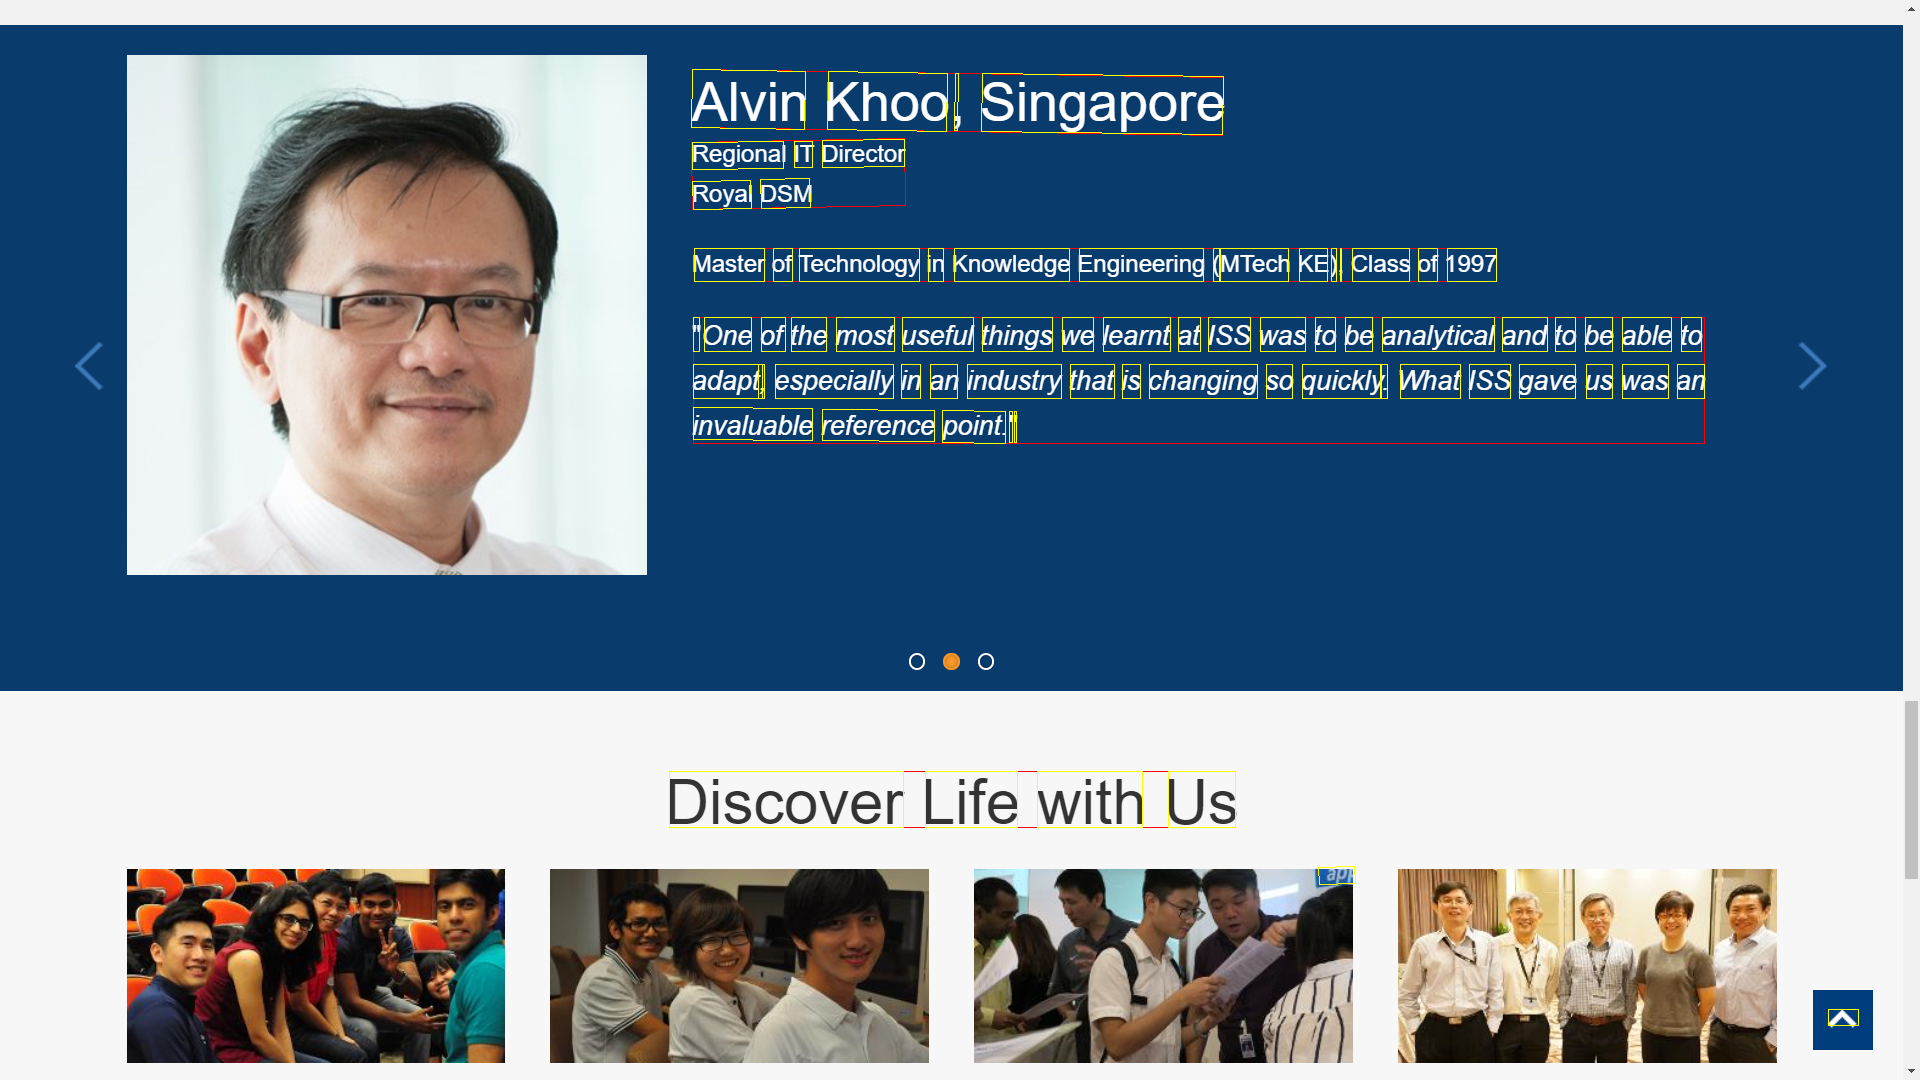

In [37]:
IPython.display.Image(filename='image/ISS-testimony-sentimentDocumentText.png')

### Safe Search Detection

Safe Search Detection detects explicit content such as adult content or violent content within an image.

https://cloud.google.com/vision/docs/detecting-safe-search

In [38]:
def didi_safe_search_detection(image):
    """Detects unsafe features in the file."""
    from google.cloud import vision
        
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################
   
    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.safe_search_detection(image=image)
    safe = response.safe_search_annotation

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Safe search:')

    print('  * adult    : {}'.format(likelihood_name[safe.adult]))
    print('  * medical  : {}'.format(likelihood_name[safe.medical]))
    print('  * spoofed  : {}'.format(likelihood_name[safe.spoof]))
    print('  * violence : {}'.format(likelihood_name[safe.violence]))
    print('  * racy     : {}'.format(likelihood_name[safe.racy]))

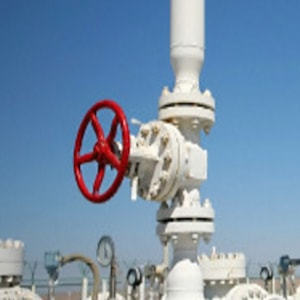

In [39]:
IPython.display.Image(filename='image/normal_valve_39.jpg')

In [40]:
didi_safe_search_detection('image/normal_valve_39.jpg')

Safe search:
  * adult    : VERY_UNLIKELY
  * medical  : VERY_UNLIKELY
  * spoofed  : VERY_UNLIKELY
  * violence : VERY_UNLIKELY
  * racy     : VERY_UNLIKELY


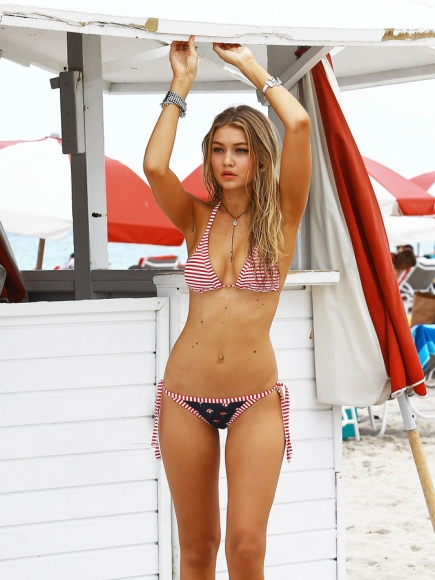

In [41]:
IPython.display.Image(filename='image/adult0.jpg')

In [42]:
didi_safe_search_detection('image/adult0.jpg')

Safe search:
  * adult    : UNLIKELY
  * medical  : UNLIKELY
  * spoofed  : VERY_UNLIKELY
  * violence : VERY_UNLIKELY
  * racy     : VERY_LIKELY


https://en.oxforddictionaries.com/definition/racy

Definition of racy in English:

### racy

ADJECTIVE


* 1 Lively, entertaining, and typically sexually titillating.

    ‘The novel was considered rather racy at the time.’


     1.1 Showing vigour or spirit.

     1.2 (of a wine, flavour, etc.) having a characteristic quality in a high degree.


* 2 (of a vehicle or animal) designed or bred to be suitable for racing.


    ‘The yacht is fast and racy.’
    

### racy

形容词


* 1 活泼，有趣，通常是性感的。

     "这部小说在当时被认为是相当活泼的。"


      1.1 表现出活力或精神。

      1.2（葡萄酒，香精等）具有高度特征品质。


* 2（车辆或动物）设计或培育适合比赛。


     "这艘游艇快速而且充满活力。"

### Web Deteciton
https://cloud.google.com/vision/docs/detecting-web

In [35]:
def didi_web_detection(image):
    """Detects web annotations given an image."""
    from google.cloud import vision
    
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.web_detection(image=image)
    annotations = response.web_detection

    if annotations.best_guess_labels:
        for label in annotations.best_guess_labels:
            print('\nBest guess label: {}'.format(label.label))

    if annotations.pages_with_matching_images:
        print('\n{} Pages with matching images found:'.format(
            len(annotations.pages_with_matching_images)))

        for page in annotations.pages_with_matching_images:
            print('\n\tPage url   : {}'.format(page.url))

            if page.full_matching_images:
                print('\t{} Full Matches found: '.format(
                       len(page.full_matching_images)))

                for image in page.full_matching_images:
                    print('\t\tImage url  : {}'.format(image.url))

            if page.partial_matching_images:
                print('\t{} Partial Matches found: '.format(
                       len(page.partial_matching_images)))

                for image in page.partial_matching_images:
                    print('\t\tImage url  : {}'.format(image.url))

    if annotations.web_entities:
        print('\n{} Web entities found: '.format(
            len(annotations.web_entities)))

        for entity in annotations.web_entities:
            print('\n\tScore       : {0:.3f}'.format(entity.score))
            print (u'\tDescription : {}'.format(entity.description))

    if annotations.visually_similar_images:
        print('\n{} visually similar images found:\n'.format(
            len(annotations.visually_similar_images)))

        for image in annotations.visually_similar_images:
            print('\tImage url    : {}'.format(image.url))

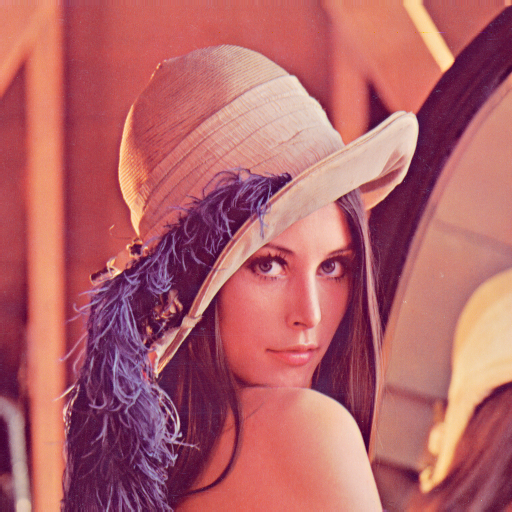

In [36]:
IPython.display.Image(filename='image/Lenna.png')

In [37]:
didi_web_detection('image/Lenna.png')


Best guess label: first lady of the internet

10 Pages with matching images found:

	Page url   : https://imgur.com/gallery/XXaCRKT
	1 Partial Matches found: 
		Image url  : https://i.imgur.com/XXaCRKT.jpg

	Page url   : https://pssiusa.blog/2018/03/15/the-first-lady-of-the-internet/
	2 Partial Matches found: 
		Image url  : https://pssiusa.files.wordpress.com/2018/03/lenapic.jpg?w=584
		Image url  : https://pssiusa.files.wordpress.com/2018/03/lenapic.jpg

	Page url   : https://www.pinterest.com/pin/54746951690331166/
	1 Partial Matches found: 
		Image url  : https://i.pinimg.com/originals/81/4a/00/814a0034f5549e957ee61360d87457e5.png

	Page url   : https://imgur.com/gallery/KAVjr8b
	1 Partial Matches found: 
		Image url  : https://i.imgur.com/KAVjr8b.jpg

	Page url   : http://busy.org/@aimal/did-you-know-the-first-lady-of-internet-lena-or-lenna-safe-for-work
	1 Partial Matches found: 
		Image url  : https://steemitimages.com/0x0/https://upload.wikimedia.org/wikipedia/en/2/24/Lenna.pn

---

## <span style="color:blue">Wrap cloud APIs into Functions() for conversational virtual assistant (VA):</span>

### * 识别图片消息中的物体名字 (Recognize objects in image) 
    [1] 物体名 (General Object)

In [38]:
# Running Vision API
# 'LABEL_DETECTION'

def va_didi_label_detection(image_file, API_type='label_detection', maxResults=20):
    """Uses the Vision API to detect labels in the given file.

    Args:
        face_file: A file-like object containing an image with faces.

    Returns:
        An array of lABEL objects with information about the picture.
    """
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")

    # Loads the image into memory
#     with open(image_file, 'rb') as image:
    with io.open(image_file, 'rb') as image:
        content = image.read()

#     image = types.Image(content=content)        
    image = vision.Image(content=content)        
        
    # Performs label detection on the image file
    response = client.label_detection(image=image)
    labels = response.label_annotations

    
    image_analysis_reply = u'\n[ ' + API_type + u' 物体识别 ]\n'
    # 'LABEL_DETECTION'
    if labels[0].description != "":
        for label in labels:
            # Debug starts
            print(label.description)
            # Debug ends
            image_analysis_reply +=  '( ' + str("{0:.3f}".format(label.score)) + '  ' + label.description + ' )\n'
    else:
        image_analysis_reply += u'[ Nill 无结果 ]\n'
        
    return image_analysis_reply    
    

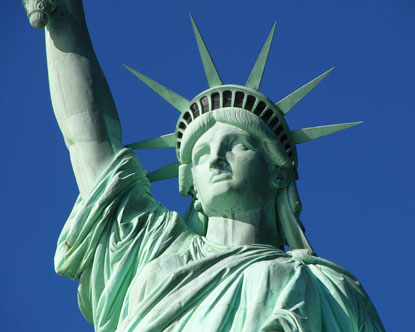

In [39]:
IPython.display.Image(filename='image/new-york-statue-of-liberty.jpg')

In [40]:
image_analysis_reply = va_didi_label_detection('image/new-york-statue-of-liberty.jpg')
print(" ")
print("=======================================================")
print("Formatted message is shown below for virtual assistant:")
print("=======================================================")
print(image_analysis_reply)

statue
landmark
monument
sky
organism
artwork
classical sculpture
national historic landmark
religion
 
Formatted message is shown below for virtual assistant:

[ label_detection 物体识别 ]
( 0.981  statue )
( 0.950  landmark )
( 0.932  monument )
( 0.798  sky )
( 0.649  organism )
( 0.634  artwork )
( 0.603  classical sculpture )
( 0.601  national historic landmark )
( 0.515  religion )



### * 识别图片消息中的物体名字 (Recognize objects in image) 
    [2] 地标名 (Landmark Object)

In [41]:
def va_didi_landmark_detection(image, API_type='landmark_detection', maxResults=20):
    """Detects landmarks in the file."""
    from google.cloud import vision
    
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.landmark_detection(image=image)
    landmarks = response.landmark_annotations
    print('Landmarks:')

    image_analysis_reply = u'\n[ ' + API_type + u' 地标识别 ]\n'   
    
    
    for landmark in landmarks:
        print(landmark.description)
        image_analysis_reply +=  '( ' + landmark.description + ' )\n'
        for location in landmark.locations:
            lat_lng = location.lat_lng
            print('Latitude  : {}'.format(lat_lng.latitude))
            print('Longitude : {}'.format(lat_lng.longitude))
            image_analysis_reply +=  '  ' + '* Latitude  : {}'.format(lat_lng.latitude)  + '\n'
            image_analysis_reply +=  '  ' + '* Longitude : {}'.format(lat_lng.longitude) + '\n'
        
    return image_analysis_reply    
                        

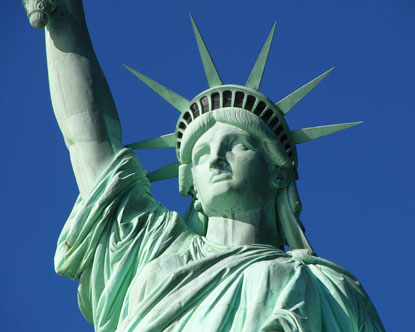

In [42]:
IPython.display.Image(filename='image/new-york-statue-of-liberty.jpg')

In [43]:
image_analysis_reply = va_didi_landmark_detection('image/new-york-statue-of-liberty.jpg')
print(" ")
print("=======================================================")
print("Formatted message is shown below for virtual assistant:")
print("=======================================================")
print(image_analysis_reply)

Landmarks:
Statue of Liberty
Latitude  : 40.689261
Longitude : -74.044482
 
Formatted message is shown below for virtual assistant:

[ landmark_detection 地标识别 ]
( Statue of Liberty )
  * Latitude  : 40.689261
  * Longitude : -74.044482



### * 识别图片消息中的物体名字 (Recognize objects in image) 
    [3] 商标名 (Logo Object)

In [44]:
def va_didi_logo_detection(image, API_type='logo_detection', maxResults=20):
    """Detects logos in the file."""
    from google.cloud import vision
        
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.logo_detection(image=image)
    logos = response.logo_annotations
    print('Logos:')

    image_analysis_reply = u'\n[ ' + API_type + u' 商标识别 ]\n'   
        
    for logo in logos:
        print(logo.description)
        image_analysis_reply +=  '( ' + logo.description + ' )\n'
        
    return image_analysis_reply    


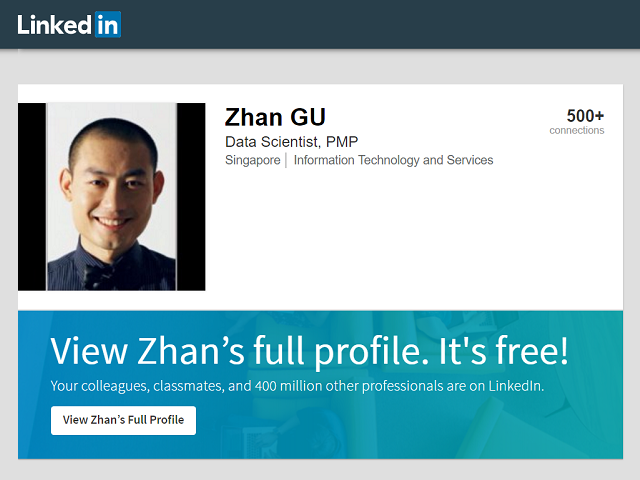

In [45]:
IPython.display.Image(filename='image/ZhanGu.png')

In [46]:
image_analysis_reply = va_didi_logo_detection('image/ZhanGu.png')
print(" ")
print("=======================================================")
print("Formatted message is shown below for virtual assistant:")
print("=======================================================")
print(image_analysis_reply)

Logos:
LinkedIn
 
Formatted message is shown below for virtual assistant:

[ logo_detection 商标识别 ]
( LinkedIn )



### * 识别图片消息中的文字 (OCR: Extract text from image)

In [47]:
def va_didi_text_detection(image, API_type='text_detection', maxResults=20):
    """Detects text in the file."""
    from google.cloud import vision
        
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    image_analysis_reply = u'\n[ ' + API_type + u' 文字提取 ]\n'
    
    for text in texts:
        print('\n"{}"'.format(text.description))
        image_analysis_reply +=  '( ' + text.description + ' )\n'

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))
    
    return image_analysis_reply    


In [48]:
image_analysis_reply = va_didi_text_detection('image/ZhanGu.png')
print(" ")
print("=======================================================")
print("Formatted message is shown below for virtual assistant:")
print("=======================================================")
print(image_analysis_reply)

Texts:

"Linked in
Zhan GU
Data Scientist, PMP
Singapore Information Technology and Services
500+
connections
View Zhan's full profile. It's free!
Your colleagues, classmates, and 400 million other professionals are on Linkedln.
View Zhan's Full Profile
"
bounds: (17,14),(604,14),(604,422),(17,422)

"Linked"
bounds: (17,14),(89,14),(89,32),(17,32)

"in"
bounds: (97,14),(116,14),(116,32),(97,32)

"Zhan"
bounds: (224,107),(280,107),(280,124),(224,124)

"GU"
bounds: (290,107),(323,107),(323,124),(290,124)

"Data"
bounds: (225,135),(255,135),(255,146),(225,146)

"Scientist,"
bounds: (260,135),(319,135),(319,147),(260,147)

"PMP"
bounds: (326,135),(356,135),(356,145),(326,145)

"Singapore"
bounds: (225,153),(278,153),(278,167),(225,167)

"Information"
bounds: (290,153),(352,153),(352,167),(290,167)

"Technology"
bounds: (358,153),(417,153),(417,167),(358,167)

"and"
bounds: (421,153),(441,153),(441,167),(421,167)

"Services"
bounds: (445,153),(491,153),(491,167),(445,167)

"500+"
bounds: (5

### * 人脸检测 (Recognize human face)
### * 基于人脸的表情来识别喜怒哀乐等情绪 (Identify sentiment and emotion from human face)

In [49]:
def va_didi_face_detection_emotion(image, API_type='face_detection_emotion', maxResults=20):
    """Detects faces in an image."""
    from google.cloud import vision
        
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################
   
    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Found {} face{}  : Emotion '.format(len(faces), '' if len(faces) == 1 else 's'))
    image_analysis_reply = u'\n[ ' + API_type + u' 面部表情 ]\n'
    face_count = 0

    for face in faces:
        print('  * anger       : {}'.format(likelihood_name[face.anger_likelihood]))
        print('  * joy         : {}'.format(likelihood_name[face.joy_likelihood]))
        print('  * sorrow      : {}'.format(likelihood_name[face.sorrow_likelihood]))
        print('  * surprise    : {}'.format(likelihood_name[face.surprise_likelihood]))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        print('  * face bounds : {}\n'.format(','.join(vertices)))
        
        face_count += 1
        image_analysis_reply += u'\n----- No.' + str(face_count) + ' Face -----\n'
        
        image_analysis_reply += u'  * Anger 愤怒    : ' \
        + likelihood_name[face.anger_likelihood] + '\n'
            
        image_analysis_reply += u'  * Joy 喜悦      : ' \
        + likelihood_name[face.joy_likelihood] + '\n'
            
        image_analysis_reply += u'  * Sorrow 悲伤   : ' \
        + likelihood_name[face.sorrow_likelihood] + '\n'
            
        image_analysis_reply += u'  * Surprise 惊奇 : ' \
        + likelihood_name[face.surprise_likelihood] + '\n'
            
    return image_analysis_reply        

In [50]:
image_analysis_reply = va_didi_face_detection_emotion('image/ZhanGu.png')
print(" ")
print("=======================================================")
print("Formatted message is shown below for virtual assistant:")
print("=======================================================")
print(image_analysis_reply)

Found 1 face  : Emotion 
  * anger       : VERY_UNLIKELY
  * joy         : VERY_LIKELY
  * sorrow      : VERY_UNLIKELY
  * surprise    : VERY_UNLIKELY
  * face bounds : (53,108),(174,108),(174,249),(53,249)

 
Formatted message is shown below for virtual assistant:

[ face_detection_emotion 面部表情 ]

----- No.1 Face -----
  * Anger 愤怒    : VERY_UNLIKELY
  * Joy 喜悦      : VERY_LIKELY
  * Sorrow 悲伤   : VERY_UNLIKELY
  * Surprise 惊奇 : VERY_UNLIKELY



### * 受限内容识别 (Explicit Content Detection)

Detect explicit content like adult content or violent content within an image.

In [51]:
def va_didi_safe_search_detection(image, API_type='safe_search_detection', maxResults=20):
    """Detects unsafe features in the file."""
    from google.cloud import vision
        
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################
   
    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.safe_search_detection(image=image)
    safe = response.safe_search_annotation

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Safe search:')

    print('  * adult    : {}'.format(likelihood_name[safe.adult]))
    print('  * medical  : {}'.format(likelihood_name[safe.medical]))
    print('  * spoofed  : {}'.format(likelihood_name[safe.spoof]))
    print('  * violence : {}'.format(likelihood_name[safe.violence]))
    print('  * racy     : {}'.format(likelihood_name[safe.racy]))
    
    image_analysis_reply = u'\n[ ' + API_type + u' 受限内容 ]\n'
    image_analysis_reply += ('  * adult    : {}\n'.format(likelihood_name[safe.adult]))
    image_analysis_reply += ('  * medical  : {}\n'.format(likelihood_name[safe.medical]))
    image_analysis_reply += ('  * spoofed  : {}\n'.format(likelihood_name[safe.spoof]))
    image_analysis_reply += ('  * violence : {}\n'.format(likelihood_name[safe.violence]))
    image_analysis_reply += ('  * racy     : {}\n'.format(likelihood_name[safe.racy]))
            
    return image_analysis_reply    


In [52]:
image_analysis_reply = va_didi_safe_search_detection('image/ZhanGu.png')
print(" ")
print("=======================================================")
print("Formatted message is shown below for virtual assistant:")
print("=======================================================")
print(image_analysis_reply)

Safe search:
  * adult    : VERY_UNLIKELY
  * medical  : UNLIKELY
  * spoofed  : UNLIKELY
  * violence : VERY_UNLIKELY
  * racy     : VERY_UNLIKELY
 
Formatted message is shown below for virtual assistant:

[ safe_search_detection 受限内容 ]
  * adult    : VERY_UNLIKELY
  * medical  : UNLIKELY
  * spoofed  : UNLIKELY
  * violence : VERY_UNLIKELY
  * racy     : VERY_UNLIKELY



### * 线上实体检测 (Detecting Web Entities and Pages)
Web Detection detects Web references to an image.

In [53]:
def va_didi_web_detection(image, API_type='web_detection', maxResults=20):
    """Detects web annotations given an image."""
    from google.cloud import vision
    
##################################################################
#     client = vision.ImageAnnotatorClient()
# 
#     client = vision.ImageAnnotatorClient.from_service_account_json(
#         "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    with io.open(image, 'rb') as image_file:
        content = image_file.read()

#     image = vision.types.Image(content=content)
    image = vision.Image(content=content)

    response = client.web_detection(image=image)
    annotations = response.web_detection

    image_analysis_reply = u'\n[ ' + API_type + u' 线上实体 ]\n'
            
    if annotations.best_guess_labels:
        for label in annotations.best_guess_labels:
            print('\nBest guess label: {}'.format(label.label))
            image_analysis_reply += ('\nBest guess label: {}'.format(label.label))

    if annotations.pages_with_matching_images:
        print('\n{} Pages with matching images found:'.format(
            len(annotations.pages_with_matching_images)))
        image_analysis_reply += ('\n{} Pages with matching images found:'.format(
            len(annotations.pages_with_matching_images)))

        for page in annotations.pages_with_matching_images:
            print('\n\tPage url   : {}\n'.format(page.url))
            image_analysis_reply += ('\n\tPage url   : {}\n'.format(page.url))

            if page.full_matching_images:
                print('\t{} Full Matches found: '.format(
                       len(page.full_matching_images)))
                image_analysis_reply += ('\t{} Full Matches found: '.format(
                       len(page.full_matching_images)))

                for image in page.full_matching_images:
                    print('\t\tImage url  : {}'.format(image.url))
                    image_analysis_reply += ('\n\t\tImage url  : {}'.format(image.url))

            if page.partial_matching_images:
                print('\t{} Partial Matches found: '.format(
                       len(page.partial_matching_images)))
                image_analysis_reply += ('\t{} Partial Matches found: '.format(
                       len(page.partial_matching_images)))

                for image in page.partial_matching_images:
                    print('\t\tImage url  : {}'.format(image.url))
                    image_analysis_reply += ('\n\t\tImage url  : {}'.format(image.url))

    if annotations.web_entities:
        print('\n{} Web entities found: '.format(
            len(annotations.web_entities)))
        image_analysis_reply += ('\n{} Web entities found: '.format(
            len(annotations.web_entities)))

        for entity in annotations.web_entities:
            print('\n\tScore       : {0:.3f}'.format(entity.score))
            image_analysis_reply += ('\n\tScore       : {0:.3f}\n'.format(entity.score))
            print (u'\tDescription : {}'.format(entity.description))
            image_analysis_reply +=  (u'\tDescription : {}\n'.format(entity.description))

    if annotations.visually_similar_images:
        print('\n{} visually similar images found:\n'.format(
            len(annotations.visually_similar_images)))
        image_analysis_reply += ('\n{} visually similar images found:\n'.format(
            len(annotations.visually_similar_images)))

        for image in annotations.visually_similar_images:
            print('\tImage url    : {}'.format(image.url))
            image_analysis_reply += ('\tImage url    : {}\n'.format(image.url))
            
    return image_analysis_reply             
            

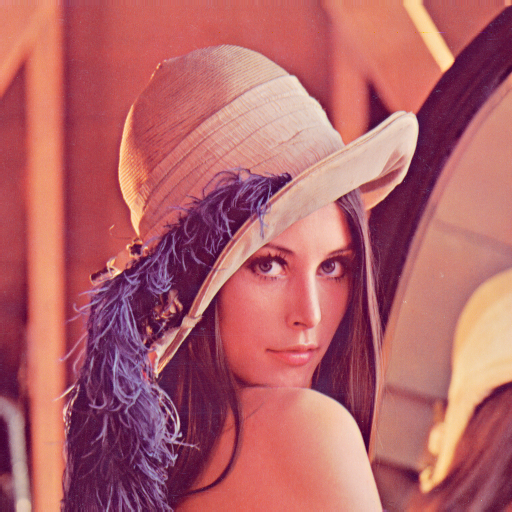

In [54]:
IPython.display.Image(filename='image/Lenna.png')

In [55]:
image_analysis_reply = va_didi_web_detection('image/Lenna.png')
print(" ")
print("=======================================================")
print("Formatted message is shown below for virtual assistant:")
print("=======================================================")
print(image_analysis_reply)


Best guess label: first lady of the internet

10 Pages with matching images found:

	Page url   : https://imgur.com/gallery/XXaCRKT

	1 Partial Matches found: 
		Image url  : https://i.imgur.com/XXaCRKT.jpg

	Page url   : https://pssiusa.blog/2018/03/15/the-first-lady-of-the-internet/

	2 Partial Matches found: 
		Image url  : https://pssiusa.files.wordpress.com/2018/03/lenapic.jpg?w=584
		Image url  : https://pssiusa.files.wordpress.com/2018/03/lenapic.jpg

	Page url   : https://www.pinterest.com/pin/54746951690331166/

	1 Partial Matches found: 
		Image url  : https://i.pinimg.com/originals/81/4a/00/814a0034f5549e957ee61360d87457e5.png

	Page url   : https://imgur.com/gallery/KAVjr8b

	1 Partial Matches found: 
		Image url  : https://i.imgur.com/KAVjr8b.jpg

	Page url   : http://busy.org/@aimal/did-you-know-the-first-lady-of-internet-lena-or-lenna-safe-for-work

	1 Partial Matches found: 
		Image url  : https://steemitimages.com/0x0/https://upload.wikimedia.org/wikipedia/en/2/24/Len

## <span style="color:blue">Start interactive conversational virtual assistant (VA):</span>

### Import ItChat, etc. 导入需要用到的一些功能程序库：

In [56]:
# import io, os, subprocess, sys, time, datetime, requests, itchat
import itchat
from itchat.content import *
# from googleapiclient.discovery import build

### 机器智能API接口控制参数 (Define control parameters for API)

In [57]:
# 2018 Oct: Parameters in this cell are not used for py3_local version at the moment.

# control parameter for Image API:
parm_image_maxResults = 20 # max objects or faces to be extracted from image analysis

# control parameter for Language Translation API:
parm_translation_origin_language = '' # original language in text: to be overwriten by TEXT_DETECTION
parm_translation_target_language = 'zh' # target language for translation: Chinese

### Log in using QR code image / 用微信App扫QR码图片来自动登录

In [58]:
# itchat.auto_login(hotReload=True) # hotReload=True: 退出程序后暂存登陆状态。即使程序关闭，一定时间内重新开启也可以不用重新扫码。
itchat.auto_login(enableCmdQR=-2) # enableCmdQR=-2: 命令行显示QR图片

Getting uuid of QR code.


                                                                              
  ██████████████    ██      ████      ██████      ██  ██      ██████████████  
  ██          ██    ██  ████████                    ██        ██          ██  
  ██  ██████  ██  ██████  ██████████  ██    ████    ██  ████  ██  ██████  ██  
  ██  ██████  ██  ██  ██  ██  ████  ██  ████        ████████  ██  ██████  ██  
  ██  ██████  ██    ██      ████  ██  ██  ██    ██  ████      ██  ██████  ██  
  ██          ██      ██    ██████  ██    ██    ██    ██      ██          ██  
  ██████████████  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██████████████  
                    ██  ██    ██████        ████  ████  ████                  
        ████  ████  ██████              ██      ████                ████      
    ████    ██  ████          ██  ██      ████  ██  ██  ████    ████    ██    
    ██    ██████  ██  ██████  ██    ██      ████  ████  ████████          ██  
    ██      ██  ██      ██  ██    ████  ██  ██    ██

Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 白黑


In [60]:
# @itchat.msg_register([PICTURE], isGroupChat=True)
@itchat.msg_register([PICTURE])
def download_files(msg):
    parm_translation_origin_language = 'zh' # will be overwriten by TEXT_DETECTION
    msg.download(msg.fileName)
    print('\n=====================================================')   
    print('\nDownloaded image file name is: %s' % msg['FileName'])
    
# 2018 Oct: Manual image file conversion is no longer needed! Pass the file path directly. Yeah!
#     image_base64 = encode_image(msg['FileName'])
    
    ##############################################################################################################
    #                                          call image analysis APIs                                          #
    ##############################################################################################################
    
    image_analysis_reply = u'[ Image Analysis 图像分析结果 ]\n'

    # 1. LABEL_DETECTION:
#     image_analysis_reply += va_didi_label_detection(msg['FileName'], 'LABEL_DETECTION', parm_image_maxResults)
    image_analysis_reply += va_didi_label_detection(msg['FileName'])
    # 2. LANDMARK_DETECTION:
#     image_analysis_reply += va_didi_landmark_detection(msg['FileName'], 'LANDMARK_DETECTION', parm_image_maxResults)
    image_analysis_reply += va_didi_landmark_detection(msg['FileName'])
    # 3. LOGO_DETECTION:
#     image_analysis_reply += va_didi_logo_detection(msg['FileName'], 'LOGO_DETECTION', parm_image_maxResults)
    image_analysis_reply += va_didi_logo_detection(msg['FileName'])
    # 4. TEXT_DETECTION:
#     image_analysis_reply += va_didi_text_detection(msg['FileName'], 'TEXT_DETECTION', parm_image_maxResults)
    image_analysis_reply += va_didi_text_detection(msg['FileName'])
    # 5. FACE_DETECTION:
#     image_analysis_reply += va_didi_face_detection_emotion(msg['FileName'], 'FACE_DETECTION', parm_image_maxResults)
    image_analysis_reply += va_didi_face_detection_emotion(msg['FileName'])
    # 6. SAFE_SEARCH_DETECTION:
#     image_analysis_reply += va_didi_safe_search_detection(msg['FileName'], 'SAFE_SEARCH_DETECTION', parm_image_maxResults)
    image_analysis_reply += va_didi_safe_search_detection(msg['FileName'])
    # 7. WEB_DETECTION:
#     image_analysis_reply += va_didi_web_detection(msg['FileName'], 'WEB_DETECTION', parm_image_maxResults)
    image_analysis_reply += va_didi_web_detection(msg['FileName'])

    print('Compeleted: Image Analysis API ...')
    print('=====================================================\n')
    
    return image_analysis_reply

In [61]:
itchat.run()

Start auto replying.




Downloaded image file name is: 181025-185815.png
retail
display window
interior design
Landmarks:
Logos:
Texts:

"ASLANe
Lutong Pinoy 2
SPARKLE
"
bounds: (6,623),(2466,623),(2466,2055),(6,2055)

"ASLANe"
bounds: (2414,2054),(669,1746),(720,1459),(2465,1766)

"Lutong"
bounds: (618,1104),(569,1106),(568,1088),(617,1086)

"Pinoy"
bounds: (564,1107),(522,1109),(521,1090),(563,1088)

"2"
bounds: (517,1110),(507,1110),(506,1094),(516,1094)

"SPARKLE"
bounds: (121,659),(6,649),(9,622),(123,632)
Found 0 faces  : Emotion 
Safe search:
  * adult    : VERY_UNLIKELY
  * medical  : VERY_UNLIKELY
  * spoofed  : VERY_UNLIKELY
  * violence : VERY_UNLIKELY
  * racy     : VERY_UNLIKELY

Best guess label: display window

4 Web entities found: 

	Score       : 0.574
	Description : Window

	Score       : 0.540
	Description : Display window

	Score       : 0.519
	Description : Interior Design Services

	Score       : 0.400
	Description : Design

10 visually similar images found:

	Image url    : http://2.


Best guess label: presentation

8 Web entities found: 

	Score       : 0.595
	Description : Public Relations

	Score       : 0.561
	Description : Human behavior

	Score       : 0.534
	Description : New media

	Score       : 0.489
	Description : Human

	Score       : 0.472
	Description : Glasses

	Score       : 0.449
	Description : Media

	Score       : 0.418
	Description : Behavior

	Score       : 0.382
	Description : Public

10 visually similar images found:

	Image url    : https://media.licdn.com/media-proxy/ext?w=800&h=800&hash=wLHVOs69MdDubvNy2rtSTwLzrgo%3D&ora=1%2CaFBCTXdkRmpGL2lvQUFBPQ%2CxAVta5g-0R6jnhodx1Ey9KGTqAGj6E5DQJHUA3L0CHH05IbfPWjsKMLXebHyo0AQfH9SjQAxfue1SWTgFI7of4u6L9twjpTicMP5aRUPbhU4hGUB5sE-Pg
	Image url    : https://ranyasagittarius.files.wordpress.com/2017/09/321.jpg
	Image url    : https://pbs.twimg.com/media/DLhK2_5V4AAS8dA.jpg
	Image url    : https://pbs.twimg.com/media/DnjSwmXU4AAJJkt.jpg
	Image url    : x-raw-image:///cdeba9f1bfecda822f044587ee5b7c4f2cb46852a0

Bye~


In [62]:
# interupt kernel, then logout
itchat.logout() # 安全退出

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

LOG OUT!


### 恭喜您！已经完成了：
### 第二课：图像识别和处理
### Lesson 2: Image Recognition & Processing

* 识别图片消息中的物体名字 (Recognize objects in image)
        [1] 物体名 (General Object)
        [2] 地标名 (Landmark Object)
        [3] 商标名 (Logo Object)

* 识别图片消息中的文字 (OCR: Extract text from image)
        包含简单文本翻译 (Call text translation API)
        
* 识别人脸 (Recognize human face)
        基于人脸的表情来识别喜怒哀乐等情绪 (Identify sentiment and emotion from human face)

* 不良内容识别 (Explicit Content Detection)


### 下一课是:
### 第三课：自然语言处理：语音合成和识别
### Lesson 3: Natural Language Processing 1
* 消息文字转成语音 (Speech synthesis: text to voice)
* 语音转换成消息文字 (Speech recognition: voice to text)

<img src='reference/WeChat_SamGu_QR.png' width=80% style="float: left;">

---

---